# 1. Cleaning and Exploring Training Data

The below data set is from the years of 2007, 2009, 2011, and 2013.

In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### Read CSV

In [2]:
df = pd.read_csv('../data/train.csv')

In [4]:
df.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0


In [3]:
df.shape

(10506, 12)

In [4]:
df.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB


## Feature Engineering

#### Make Columns Lower Case

To make this dataset easy to use lets get our columns into a pythonic format.

In [6]:
df.columns = [x.lower().replace(' ', '_') for x in df.columns]

#### Replace Erraticus, Salinarius, Tarsalis, Territans with Other

Since there are four species with low value counts, we collapsed those species into one 'Other' category.

In [8]:
df['species'] = df['species'].map({'CULEX PIPIENS/RESTUANS': 'culex pipiens/restuans',
                   'CULEX RESTUANS': 'culex restuans',
                   'CULEX PIPIENS': 'culex pipiens',
                   'CULEX TERRITANS': 'culex other', 
                   'CULEX SALINARIUS': 'culex other',
                   'CULEX TARSALIS': 'culex other',
                   'CULEX ERRATICUS': 'culex other'})

#### Convert Date Column to datetime Format

To allow for even more efficiency in filtering this dataframe lets set the date column to be the index. This will allow for time series filtering to be used on the dataframe. To do this I will perform the following:

- Update the date column type to be the datetime type
- Set the index

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.set_index('date', inplace=True)

#### Make New Column for Year, Month, Day

With the date as our index, I split the year, month and day into separate columns.

In [10]:
df['year'] = df.index.year

In [11]:
df['month'] = df.index.month

In [12]:
df['day'] = df.index.day

In [13]:
df['year'].value_counts().sort_values(ascending=False)

2007    3811
2013    2392
2009    2249
2011    2054
Name: year, dtype: int64

In [14]:
df['month'].value_counts().sort_values(ascending=False)

8     3751
7     2606
9     2218
6     1571
10     276
5       84
Name: month, dtype: int64

In [15]:
df['day'].value_counts().sort_values(ascending=False)[:5]

1     864
12    815
19    674
25    656
15    642
Name: day, dtype: int64

## Exploring Data

#### Count of Species

Below are plots thart explore the distributions of various columns.

In [16]:
df_species = df['species'].value_counts().to_frame()

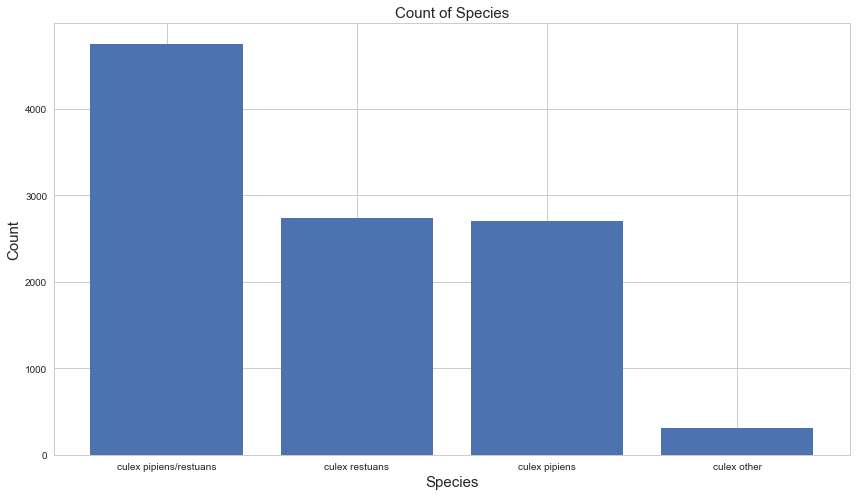

<Figure size 432x288 with 0 Axes>

In [17]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(x=df_species.index, height=df_species['species'])

ax.set_xlabel('Species', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Count of Species', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show();

plt.savefig('../plots/count_of_species')

#### Avg Number of Mosquitos Trapped per Day

In [18]:
df_day = df.groupby('day')[['nummosquitos']].mean()
df_day.reset_index(inplace=True)

In [19]:
df_day.head()

,day,nummosquitos
0,1,11.921296
1,2,12.293785
2,3,9.202703
3,4,6.848375
4,5,9.429348


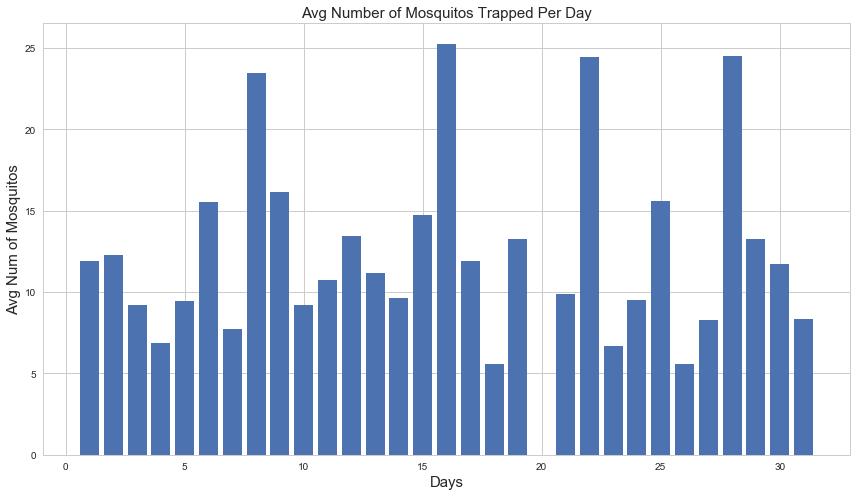

<Figure size 432x288 with 0 Axes>

In [20]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(x=df_day['day'], height=df_day['nummosquitos'])

ax.set_xlabel('Days', fontsize=15)
ax.set_ylabel('Avg Num of Mosquitos', fontsize=15)
ax.set_title('Avg Number of Mosquitos Trapped Per Day', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show();

plt.savefig('../plots/avg_num_mosquitos_day')

#### Avg Number of Mosquitos Trapped Per Month

In [21]:
df_month = df.groupby('month')[['nummosquitos']].mean()
df_month.reset_index(inplace=True)

In [22]:
df_month.head()

,month,nummosquitos
0,5,2.738095
1,6,10.552514
2,7,14.293170
3,8,15.472141
4,9,9.481064


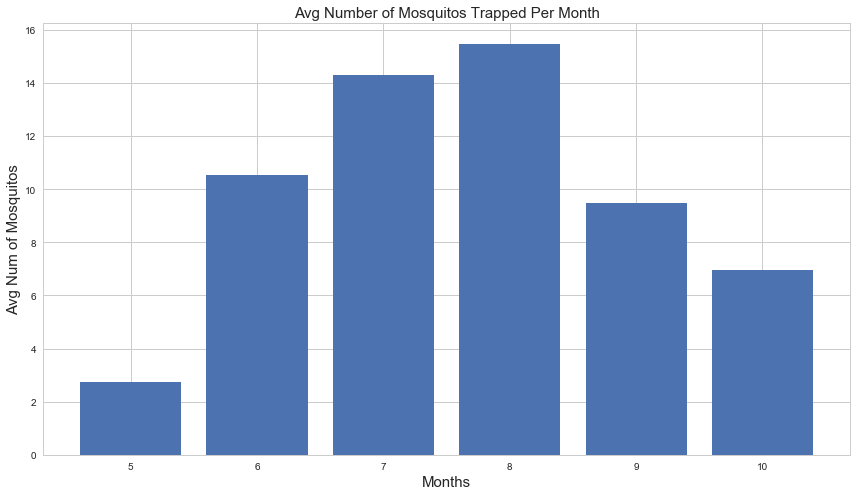

<Figure size 432x288 with 0 Axes>

In [23]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(x=df_month['month'], height=df_month['nummosquitos'])

ax.set_xlabel('Months', fontsize=15)
ax.set_ylabel('Avg Num of Mosquitos', fontsize=15)
ax.set_title('Avg Number of Mosquitos Trapped Per Month', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show();

plt.savefig('../plots/avg_num_mosquitos_month')

#### Avg Number of Mosquitos Trapped Per Year

In [24]:
df_year = df.groupby('year')[['nummosquitos']].mean()
df_year.reset_index(inplace=True)

In [25]:
df_year.head()

,year,nummosquitos
0,2007,15.399633
1,2009,9.385505
2,2011,9.152386
3,2013,15.235786


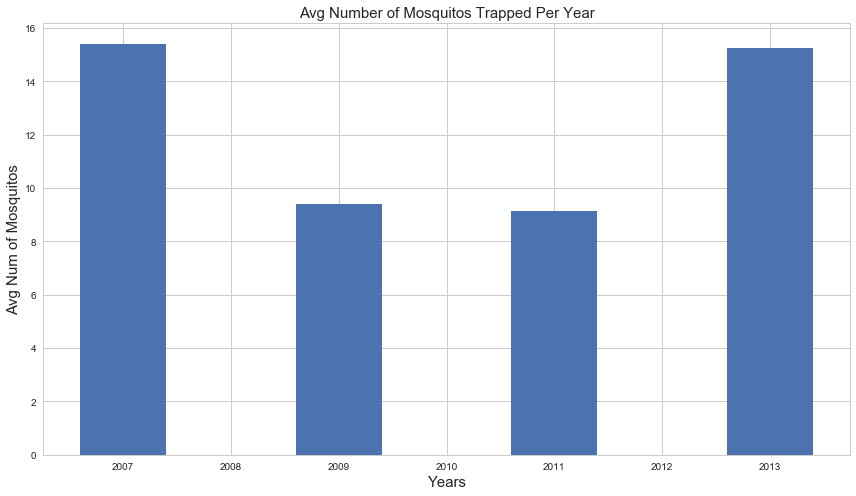

<Figure size 432x288 with 0 Axes>

In [26]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(x=df_year['year'], height=df_year['nummosquitos'])

ax.set_xlabel('Years', fontsize=15)
ax.set_ylabel('Avg Num of Mosquitos', fontsize=15)
ax.set_title('Avg Number of Mosquitos Trapped Per Year', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show();

plt.savefig('../plots/avg_num_mosquitos_year')

#### Percentage of Species with West Nile

In [27]:
df_species_wnv = df.groupby('species')[['wnvpresent']].sum() / df.groupby('species')[['wnvpresent']].count()
df_species_wnv

,wnvpresent
species,
culex other,0.000000
culex pipiens,0.088922
culex pipiens/restuans,0.055135
culex restuans,0.017883


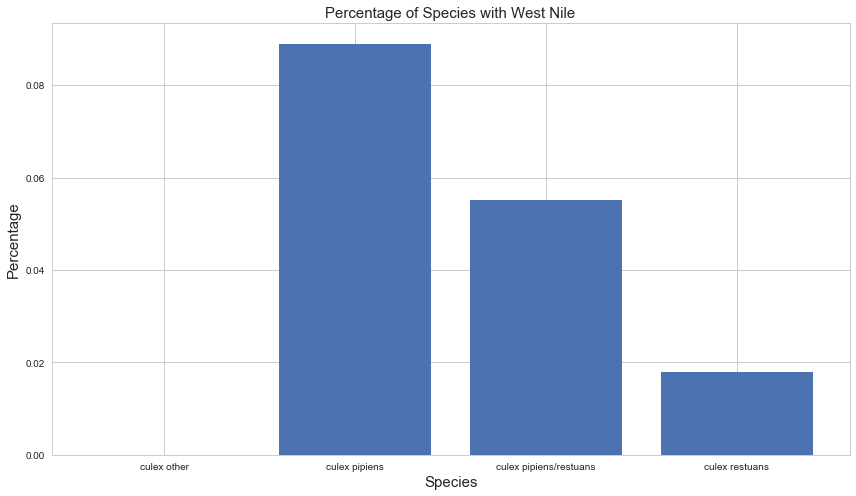

<Figure size 432x288 with 0 Axes>

In [28]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(x=df_species_wnv.index, height=df_species_wnv['wnvpresent'])

ax.set_xlabel('Species', fontsize=15)
ax.set_ylabel('Percentage', fontsize=15)
ax.set_title('Percentage of Species with West Nile', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show();

plt.savefig('../plots/percentage_species_wnv')

#### Traps with West Nile Percentage, Latitude and Longitude

In [29]:
# df.groupby('trap')[['wnvpresent', 'latitude', 'longitude']].sum() / \
# df.groupby('trap')[['wnvpresent', 'latitude', 'longitude']].count()

#### Mosquitos Caught Per Block

In [30]:
block_df = pd.DataFrame(data = df.groupby('block')['wnvpresent'].sum(), columns=['wnvpresent'])
block_df.reset_index(inplace=True)

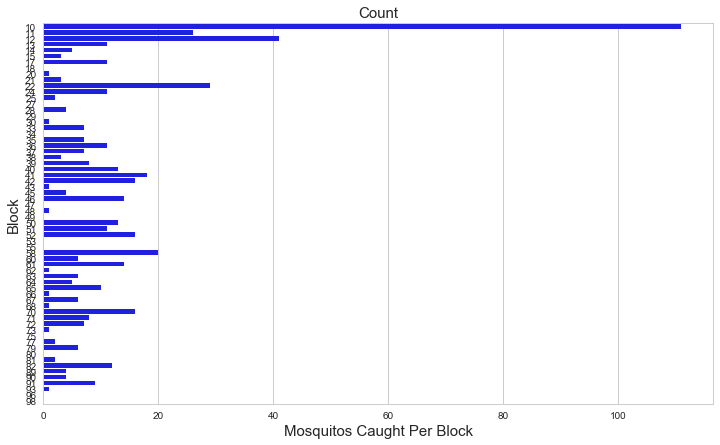

In [31]:
fig, ax = plt.subplots(figsize = (12,7))

sns.barplot(y = block_df['block'], x = block_df['wnvpresent'], orient='h', color='blue')
ax.set_title('Count', fontsize=15)
ax.set_xlabel('Mosquitos Caught Per Block', fontsize=15)
ax.set_ylabel('Block', fontsize=15);

plt.savefig('../plots/mosquitos_per_block')

#### Mosquitos with WNV by Day

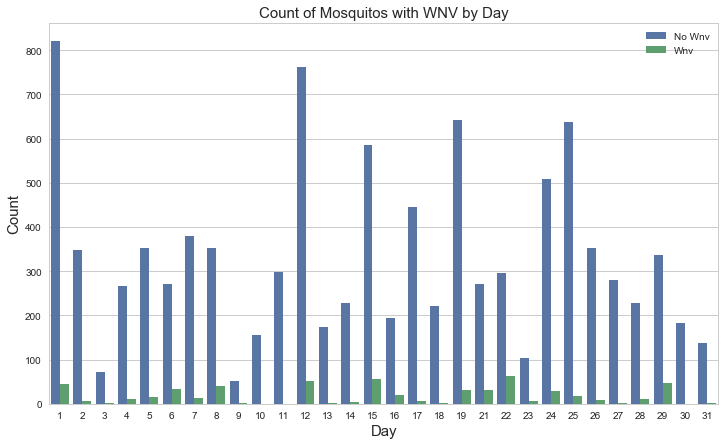

In [32]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(ax=ax, x = df['day'], hue = df['wnvpresent'])

plt.xlabel('Day', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Mosquitos with WNV by Day', fontsize=15)
plt.legend(('No Wnv', 'Wnv',),loc= 'upper right');

plt.savefig('../plots/mosquitos_wnv_day')

#### Mosquitos with WNV by Month

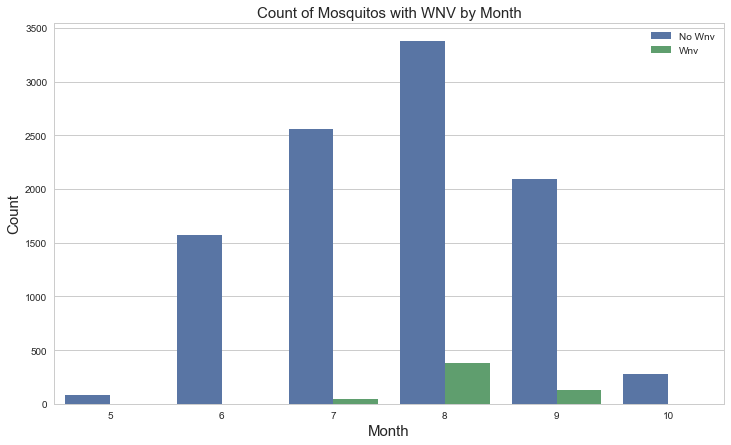

In [33]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(ax=ax, x = df['month'], hue = df['wnvpresent'])

plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Mosquitos with WNV by Month', fontsize=15)
plt.legend(('No Wnv', 'Wnv'), loc= 'upper right');

plt.savefig('../plots/mosquitos_wnv_month')

#### Mosquitos with WNV by Year

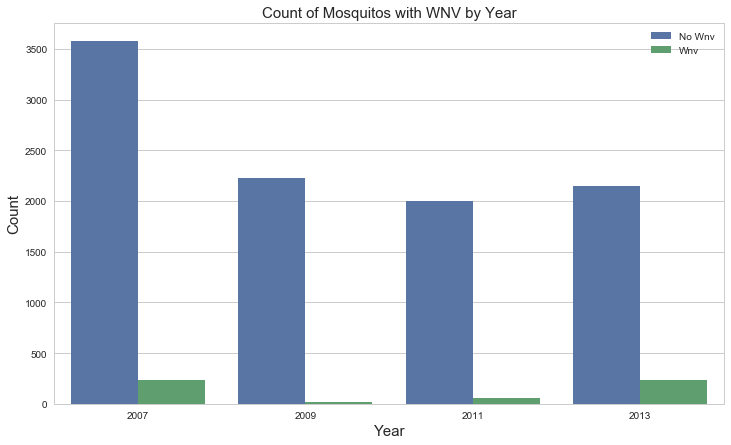

In [34]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(ax=ax, x = df['year'], hue = df['wnvpresent'])

plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Mosquitos with WNV by Year', fontsize=15)
plt.legend(('No Wnv', 'Wnv'), loc= 'upper right');

plt.savefig('../plots/mosquitos_wnv_year')

#### Species by WNV

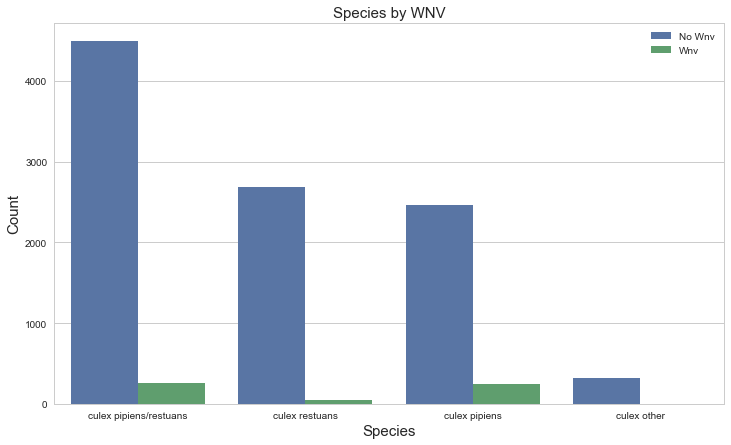

In [35]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(ax=ax, x = df['species'], hue = df['wnvpresent'])

plt.xlabel('Species', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Species by WNV', fontsize=15)
plt.legend(('No Wnv', 'Wnv'), loc= 'upper right');

plt.savefig('../plots/species_wnv')

#### Count of Traps/WnvPresent by Week

In [36]:
df.head(1)

,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,year,month,day
date,,,,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",culex pipiens/restuans,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007,5,29


In [40]:
df_trap_week = df.groupby(['date', 'trap'])[['wnvpresent', 'nummosquitos']].sum()
df_trap_week.head()

wnvpresent  nummosquitos
date       trap                          
2007-05-29 T002           0             2
           T007           0             1
           T015           0             5
           T045           0             2
           T046           0             1

In [41]:
df_trap_week.reset_index().head()

,date,trap,wnvpresent,nummosquitos
0,2007-05-29,T002,0,2
1,2007-05-29,T007,0,1
2,2007-05-29,T015,0,5
3,2007-05-29,T045,0,2
4,2007-05-29,T046,0,1


#### Export Cleaned DF

In [39]:
df.to_csv('../data/clean_train_df.csv')

In [43]:
df.columns

Index(['address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent', 'year', 'month', 'day'],
      dtype='object')